In [1]:
# all the libraries needed for data 
import pandas as pd 
from pandas import DataFrame
import numpy as np

# for graphing and visual aids 
import seaborn as sns
import matplotlib.pyplot as plt

# All libraries needed for PCA 
from scipy.stats import stats
from sklearn import preprocessing
from sklearn.decomposition import PCA

#  Load CSV File

In [2]:
# load data from medical csv 
# index is first column, CaseOrder
file = 'Desktop/medical_raw_data.csv'

#missing values used for searching for null and any other missing values 
missing_values = ['N/A', 'NA', 'None', 'n/a', 'na', '-', '.', ' ']

# loading csv, with parameters, to medical_df 
medical_df = pd.read_csv(file, index_col=[0], na_values=missing_values)

In [3]:
#view first few records 
medical_df.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
1,1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,...,3191.048774,17939.403420,3,3,2,2,4,3,3,4
2,2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,...,4214.905346,17612.998120,3,4,3,4,4,4,3,3
3,3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,...,2177.586768,17505.192460,2,4,4,4,3,4,3,3
4,4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,...,2465.118965,12993.437350,3,5,5,3,4,5,5,5
5,5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,...,1885.655137,3716.525786,2,1,3,3,5,3,4,3


In [4]:
# looking at data, we can get rid of Interaction and UID
# remove uneeded columns
to_remove = ['Interaction', 'UID']
medical_df.drop(to_remove, inplace=True, axis=1)

In [5]:
#rename columns Item1 through 8 based off Data Dictionary
medical_df = medical_df.rename(columns = {'Item1': 'Timely_admission', 'Item2' : 'Timely_treatment',
                                         'Item3' : 'Timely_visits', 'Item4' : 'Reliability',
                                         'Item5' : 'Options', 'Item6' : 'Hours_of_treatments',
                                         'Item7' : 'Courteous_staff', 'Item8' : 'Doc_active_listening'})

In [6]:
# describe the data 
#nothing looks like it's out of place while looking at min, max, and mean. All numbers seem reasonable 
medical_df.describe()

,CaseOrder,Zip,Lat,Lng,Population,Children,Age,Income,VitD_levels,Doc_visits,...,TotalCharge,Additional_charges,Timely_admission,Timely_treatment,Timely_visits,Reliability,Options,Hours_of_treatments,Courteous_staff,Doc_active_listening
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,7412.000000,7586.000000,7536.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,50159.323900,38.751099,-91.243080,9965.253800,2.098219,53.295676,40484.438268,19.412675,5.012200,...,5891.538261,12934.528586,3.518800,3.506700,3.511100,3.515100,3.496900,3.522500,3.494000,3.509700
std,2886.89568,27469.588208,5.403085,15.205998,14824.758614,2.155427,20.659182,28664.861050,6.723277,1.045734,...,3377.558136,6542.601544,1.031966,1.034825,1.032755,1.036282,1.030192,1.032376,1.021405,1.042312
min,1.00000,610.000000,17.967190,-174.209690,0.000000,0.000000,18.000000,154.080000,9.519012,1.000000,...,1256.751699,3125.702716,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2500.75000,27592.000000,35.255120,-97.352982,694.750000,0.000000,35.000000,19450.792500,16.513171,4.000000,...,3253.239465,7986.487642,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,5000.50000,50207.000000,39.419355,-88.397230,2769.000000,1.000000,53.000000,33942.280000,18.080560,5.000000,...,5852.250564,11573.979365,4.000000,3.000000,4.000000,4.000000,3.000000,4.000000,3.000000,3.000000
75%,7500.25000,72411.750000,42.044175,-80.438050,13945.000000,3.000000,71.000000,54075.235000,19.789740,6.000000,...,7614.989701,15626.491033,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,10000.00000,99929.000000,70.560990,-65.290170,122814.000000,10.000000,89.000000,207249.130000,53.019124,9.000000,...,21524.224210,30566.073130,8.000000,7.000000,8.000000,7.000000,7.000000,7.000000,7.000000,7.000000


In [7]:
# types of data 
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 50 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CaseOrder             10000 non-null  int64  
 1   Customer_id           10000 non-null  object 
 2   City                  10000 non-null  object 
 3   State                 10000 non-null  object 
 4   County                10000 non-null  object 
 5   Zip                   10000 non-null  int64  
 6   Lat                   10000 non-null  float64
 7   Lng                   10000 non-null  float64
 8   Population            10000 non-null  int64  
 9   Area                  10000 non-null  object 
 10  Timezone              10000 non-null  object 
 11  Job                   10000 non-null  object 
 12  Children              7412 non-null   float64
 13  Age                   7586 non-null   float64
 14  Education             10000 non-null  object 
 15  Employment         

In [8]:
# as we can see from the information 
# quantitative null -> Children, Age, Income, Overweight, Anxiety, Initial_days
#Let's first see how much is missing, just to see how reliable the data is 
# useful for later use 
medical_df_count = medical_df.count()

# missing data

missing_medical_df = medical_df.isna()

#missing values in data - to be shown as percentage 
missing_medical_df = missing_medical_df.sum()



In [9]:
#as percentages 
(missing_medical_df / len(medical_df)) * 100 

CaseOrder                0.00
Customer_id              0.00
City                     0.00
State                    0.00
County                   0.00
Zip                      0.00
Lat                      0.00
Lng                      0.00
Population               0.00
Area                     0.00
Timezone                 0.00
Job                      0.00
Children                25.88
Age                     24.14
Education                0.00
Employment               0.00
Income                  24.64
Marital                  0.00
Gender                   0.00
ReAdmis                  0.00
VitD_levels              0.00
Doc_visits               0.00
Full_meals_eaten         0.00
VitD_supp                0.00
Soft_drink              24.67
Initial_admin            0.00
HighBlood                0.00
Stroke                   0.00
Complication_risk        0.00
Overweight               9.82
Arthritis                0.00
Diabetes                 0.00
Hyperlipidemia           0.00
BackPain  

In [10]:
missing_medical_values = medical_df.isna().mean().round(4) * 100

#create dictionary mapping columns to null values 
missing_medical_dict = dict(missing_medical_values)

In [11]:
# to make it more legible a for loop showing only columns with null values 

col_null = {}

for key, value in missing_medical_dict.items():
    if value > 0:
        col_null[f'{key}'] = value
                 
col_null             

{'Children': 25.88,
 'Age': 24.14,
 'Income': 24.64,
 'Soft_drink': 24.67,
 'Overweight': 9.82,
 'Anxiety': 9.84,
 'Initial_days': 10.56}

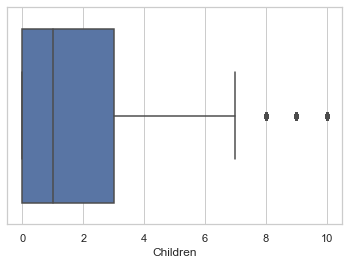

In [12]:
#simple boxplot of all numeric columns that were filled to check for outliers  
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=medical_df['Children'])

In [13]:
# outlier is 8 or above 
# change all values to nan 

medical_df['Children'].describe()

count    7412.000000
mean        2.098219
std         2.155427
min         0.000000
25%         0.000000
50%         1.000000
75%         3.000000
max        10.000000
Name: Children, dtype: float64

In [14]:
medical_df['Children'].quantile(0.25)

0.0

In [15]:
medical_df['Children'].quantile(0.75)

3.0

In [16]:
q1 = 0.0
q3 = 3.0
iqr = q3 - q1 

In [17]:
iqr

3.0

In [18]:
lower_lim = q1 - 1.5 * iqr
upper_lim = q3 + 1.5 * iqr

In [19]:
lower_lim

-4.5

In [20]:
upper_lim

7.5

In [21]:
outlier_low = (medical_df['Children'] < lower_lim)

In [22]:
outlier_high = (medical_df['Children'] > upper_lim)

In [23]:
medical_df['Children'][(outlier_low | outlier_high)]

17       10.0
80        9.0
156       8.0
157      10.0
171       8.0
         ... 
9825      8.0
9846     10.0
9871      8.0
9919      8.0
10000     8.0
Name: Children, Length: 303, dtype: float64

In [24]:
medical_df['Children'][(~outlier_low | outlier_high)]

1        1.0
2        3.0
3        3.0
4        0.0
5        NaN
        ... 
9996     NaN
9997     4.0
9998     3.0
9999     3.0
10000    8.0
Name: Children, Length: 10000, dtype: float64

In [25]:
medical_df['Children'] = medical_df['Children'][(outlier_low | ~outlier_high)]

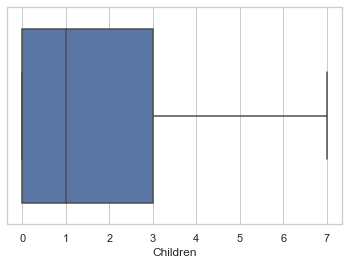

In [26]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=medical_df['Children'])

In [27]:
medical_df['Children'].isna().sum()

2891

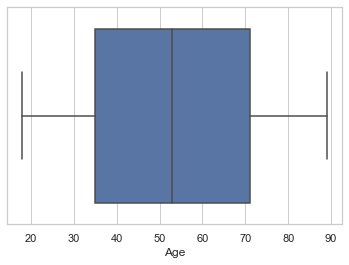

In [28]:
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=medical_df['Age'])

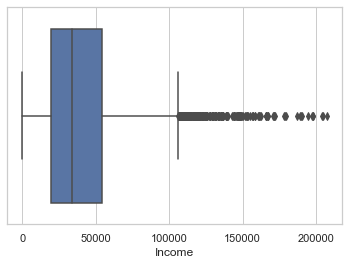

In [29]:
# Income looks like it has a bunch of outliers, so lets look at another kind of graph 
sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=medical_df['Income'])


<AxesSubplot:xlabel='Income', ylabel='Count'>

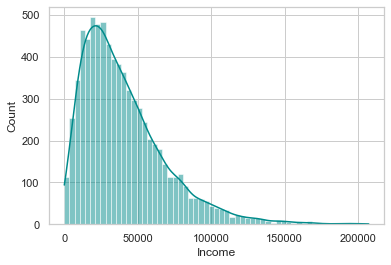

In [30]:
# histogram
sns.histplot(data=medical_df['Income'], color='darkcyan',  kde=True)


In [31]:
# the graph makes it look like there aren't really any outliers, let's find the upper and lower limits  
medical_df['Income'].describe()

count      7536.000000
mean      40484.438268
std       28664.861050
min         154.080000
25%       19450.792500
50%       33942.280000
75%       54075.235000
max      207249.130000
Name: Income, dtype: float64

In [32]:
medical_df['Income'].quantile(0.25)

19450.7925

In [33]:
medical_df['Income'].quantile(0.75)

54075.235

In [34]:
q1 = 19450.7925 
q3 = 54075.235
iqr = q3 - q1
        

In [35]:
iqr

34624.442500000005

In [36]:
lower_lim = q1 - 1.5 * iqr 
upper_lim = q3 + 15 * iqr 

In [37]:
lower_lim

-32485.871250000007

In [38]:
upper_lim

573441.8725

In [39]:
# we see that everything on the graphs are between the lower and upper limit, but let's look just to make sure 
outlier_low = (medical_df['Income'] < lower_lim)

In [40]:
outlier_high = (medical_df['Income'] > upper_lim)

In [41]:
medical_df['Income'][(outlier_low | outlier_high)]

Series([], Name: Income, dtype: float64)

In [42]:
medical_df['Income'][(~outlier_low | outlier_high)]

1        86575.93
2        46805.99
3        14370.14
4        39741.49
5         1209.56
           ...   
9996     45967.61
9997     14983.02
9998     65917.81
9999     29702.32
10000    62682.63
Name: Income, Length: 10000, dtype: float64

In [43]:
# because there is nothing below outliers and everything is below upper, we won't change anything 

In [44]:
# use mean method to fill in null values 
children_no_null = round(medical_df['Children'].mean())
age_no_null = round(medical_df['Age'].mean())
overweight_no_null = round(medical_df['Overweight'].mean())
anxiety_no_null = round(medical_df['Anxiety'].mean())
init_days_no_null= medical_df['Initial_days'].mean() #not rounded
income_no_null = round(medical_df['Income'].mean())

In [45]:
children_no_null

2

In [46]:
age_no_null

53

In [47]:
overweight_no_null

1

In [48]:
anxiety_no_null

0

In [49]:
init_days_no_null

34.432081888042994

In [50]:
income_no_null

40484

In [51]:
# fill in null values with mean values 
medical_df['Children'].fillna(children_no_null, inplace=True)
medical_df['Age'].fillna(age_no_null, inplace=True)
medical_df['Overweight'].fillna(overweight_no_null, inplace=True)
medical_df['Anxiety'].fillna(anxiety_no_null, inplace=True)
medical_df['Initial_days'].fillna(init_days_no_null, inplace=True)
medical_df['Income'].fillna(income_no_null, inplace=True)

In [52]:
# Finding and filling categorical null data 
print(medical_df['Soft_drink'])

1        NaN
2         No
3         No
4         No
5        Yes
        ... 
9996      No
9997      No
9998     Yes
9999      No
10000     No
Name: Soft_drink, Length: 10000, dtype: object


<AxesSubplot:xlabel='count', ylabel='Soft_drink'>

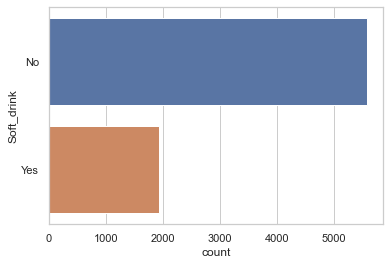

In [53]:
#graph to look at yes/no 
sns.countplot(data=medical_df, y='Soft_drink')

In [54]:
# more no's than yes, which would make that our "mean". 
medical_df['Soft_drink'].fillna('No', inplace=True)

In [55]:
# writing to a CSV file, before altering some objects to numeric 
medical_df.to_csv('Desktop/Clean_orig_data')

In [56]:
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 50 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CaseOrder             10000 non-null  int64  
 1   Customer_id           10000 non-null  object 
 2   City                  10000 non-null  object 
 3   State                 10000 non-null  object 
 4   County                10000 non-null  object 
 5   Zip                   10000 non-null  int64  
 6   Lat                   10000 non-null  float64
 7   Lng                   10000 non-null  float64
 8   Population            10000 non-null  int64  
 9   Area                  10000 non-null  object 
 10  Timezone              10000 non-null  object 
 11  Job                   10000 non-null  object 
 12  Children              10000 non-null  float64
 13  Age                   10000 non-null  float64
 14  Education             10000 non-null  object 
 15  Employment         

# Converting categories to numeric 

In [57]:
# make copy of data so it doesn't mess with cleaned data 
copy_df = medical_df.copy() 

In [58]:
#First, drop the objects we won't need
copy_df.drop('Customer_id', inplace=True, axis=1)

In [59]:
# use sklearn to convert 
label_encoder = preprocessing.LabelEncoder()

In [60]:
# iterate through copy_df and change any object to a number 
medical_categories = copy_df.select_dtypes(include='object')
categories_col = medical_categories.columns
print(categories_col)
for c in categories_col:
    copy_df[c] = label_encoder.fit_transform(copy_df[c])

Index(['City', 'State', 'County', 'Area', 'Timezone', 'Job', 'Education',
       'Employment', 'Marital', 'Gender', 'ReAdmis', 'Soft_drink',
       'Initial_admin', 'HighBlood', 'Stroke', 'Complication_risk',
       'Arthritis', 'Diabetes', 'Hyperlipidemia', 'BackPain',
       'Allergic_rhinitis', 'Reflux_esophagitis', 'Asthma', 'Services'],
      dtype='object')


In [61]:
# confirm everything is numeric 

copy_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 49 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CaseOrder             10000 non-null  int64  
 1   City                  10000 non-null  int64  
 2   State                 10000 non-null  int64  
 3   County                10000 non-null  int64  
 4   Zip                   10000 non-null  int64  
 5   Lat                   10000 non-null  float64
 6   Lng                   10000 non-null  float64
 7   Population            10000 non-null  int64  
 8   Area                  10000 non-null  int64  
 9   Timezone              10000 non-null  int64  
 10  Job                   10000 non-null  int64  
 11  Children              10000 non-null  float64
 12  Age                   10000 non-null  float64
 13  Education             10000 non-null  int64  
 14  Employment            10000 non-null  int64  
 15  Income             

# Apply PCA

# Histogram with Target Overlay
 ### our target is ReAdmis 

In [62]:
# target is Readmission
target = 'ReAdmis'

# a method for plotting 
def graph_overlay(target, c, height, width):
    medical_df.groupby([c, target]).size().unstack().plot(kind='bar', stacked=True, figsize=(width, height))
    print(pd.crosstab(medical_df[target],
                     medical_df[c],
                     margins = True))

Stroke     No   Yes    All
ReAdmis                   
No       5071  1260   6331
Yes      2936   733   3669
All      8007  1993  10000


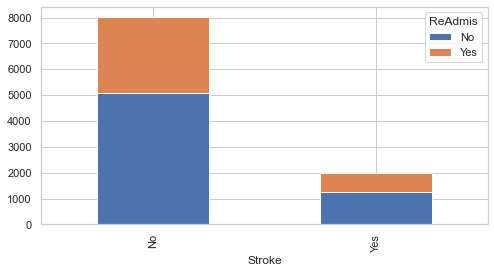

In [63]:
graph_overlay(target, 'Stroke', 4,8)

HighBlood    No   Yes    All
ReAdmis                     
No         3747  2584   6331
Yes        2163  1506   3669
All        5910  4090  10000


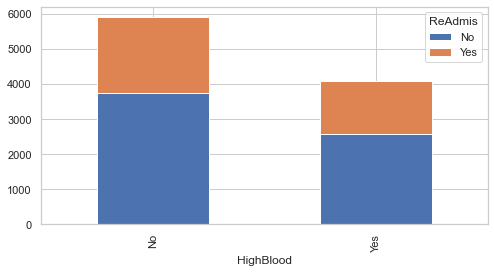

In [64]:
graph_overlay(target, 'HighBlood', 4,8)

Complication_risk  High   Low  Medium    All
ReAdmis                                     
No                 2135  1343    2853   6331
Yes                1223   782    1664   3669
All                3358  2125    4517  10000


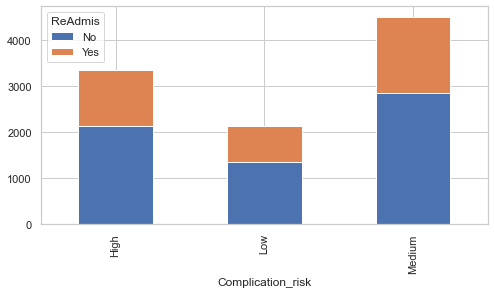

In [65]:
graph_overlay(target, 'Complication_risk', 4,8)

Initial_admin  Elective Admission  Emergency Admission  Observation Admission  \
ReAdmis                                                                         
No                           1608                 3156                   1567   
Yes                           896                 1904                    869   
All                          2504                 5060                   2436   

Initial_admin    All  
ReAdmis               
No              6331  
Yes             3669  
All            10000  


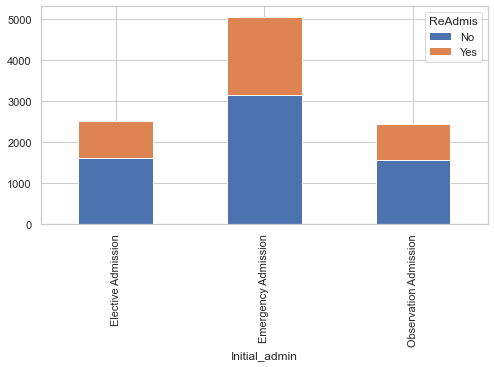

In [66]:
graph_overlay(target, 'Initial_admin', 4,8)

Services  Blood Work  CT Scan  Intravenous  MRI    All
ReAdmis                                               
No              3335      737         2027  232   6331
Yes             1930      488         1103  148   3669
All             5265     1225         3130  380  10000


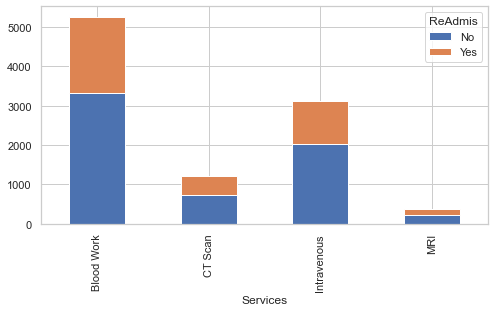

In [67]:
graph_overlay(target, 'Services', 4,8)

Gender   Female  Male  Prefer not to answer    All
ReAdmis                                           
No         3205  2995                   131   6331
Yes        1813  1773                    83   3669
All        5018  4768                   214  10000


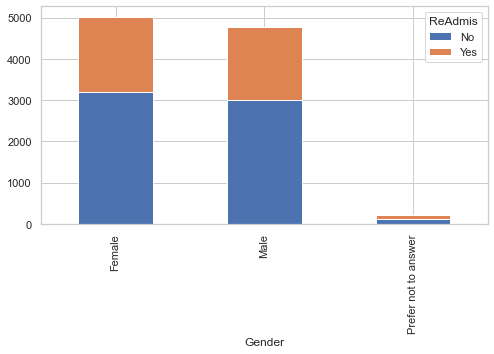

In [68]:
graph_overlay(target, 'Gender', 4,8)

Children   0.0   1.0   2.0   3.0  4.0  5.0  6.0  7.0    All
ReAdmis                                                    
No        1191  1208  2521   711  449   81   76   94   6331
Yes        689   650  1464   402  290   45   69   60   3669
All       1880  1858  3985  1113  739  126  145  154  10000


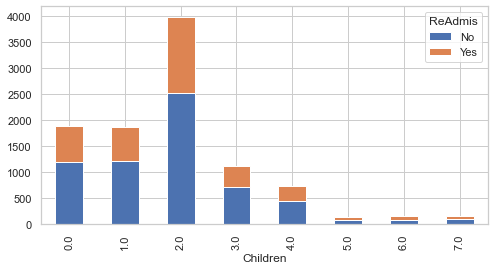

In [69]:
graph_overlay(target, 'Children', 4,8)

Area     Rural  Suburban  Urban    All
ReAdmis                               
No        2150      2106   2075   6331
Yes       1219      1222   1228   3669
All       3369      3328   3303  10000


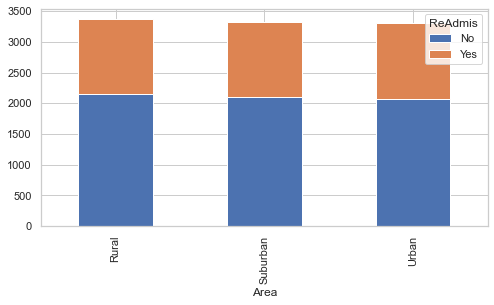

In [70]:
graph_overlay(target, 'Area', 4,8)

Employment  Full Time  Part Time  Retired  Student  Unemployed    All
ReAdmis                                                              
No               3827        627      601      642         634   6331
Yes              2202        364      379      375         349   3669
All              6029        991      980     1017         983  10000


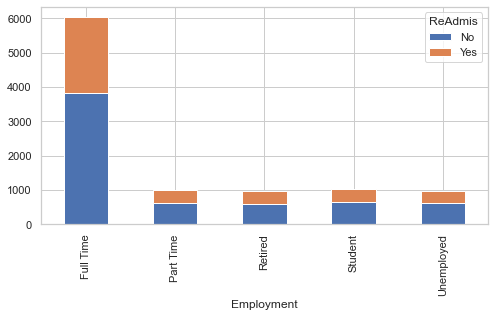

In [71]:
graph_overlay(target, 'Employment', 4,8)

Timezone  America/Adak  America/Anchorage  America/Boise  America/Chicago  \
ReAdmis                                                                     
No                   0                 36             59             2351   
Yes                  1                 14             27             1420   
All                  1                 50             86             3771   

Timezone  America/Denver  America/Detroit  America/Indiana/Indianapolis  \
ReAdmis                                                                   
No                   395              154                            99   
Yes                  217              108                            52   
All                  612              262                           151   

Timezone  America/Indiana/Knox  America/Indiana/Marengo  \
ReAdmis                                                   
No                           1                        1   
Yes                          0                        2   
Al

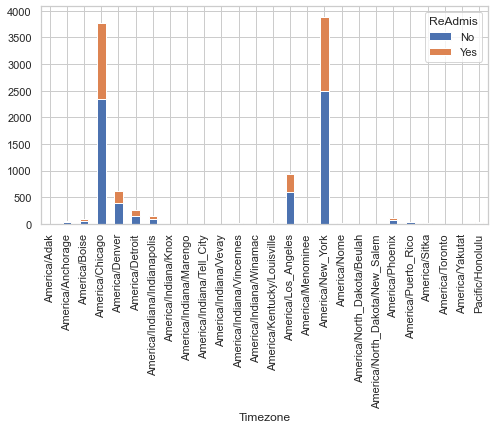

In [72]:
graph_overlay(target, 'Timezone', 4,8)

<AxesSubplot:>

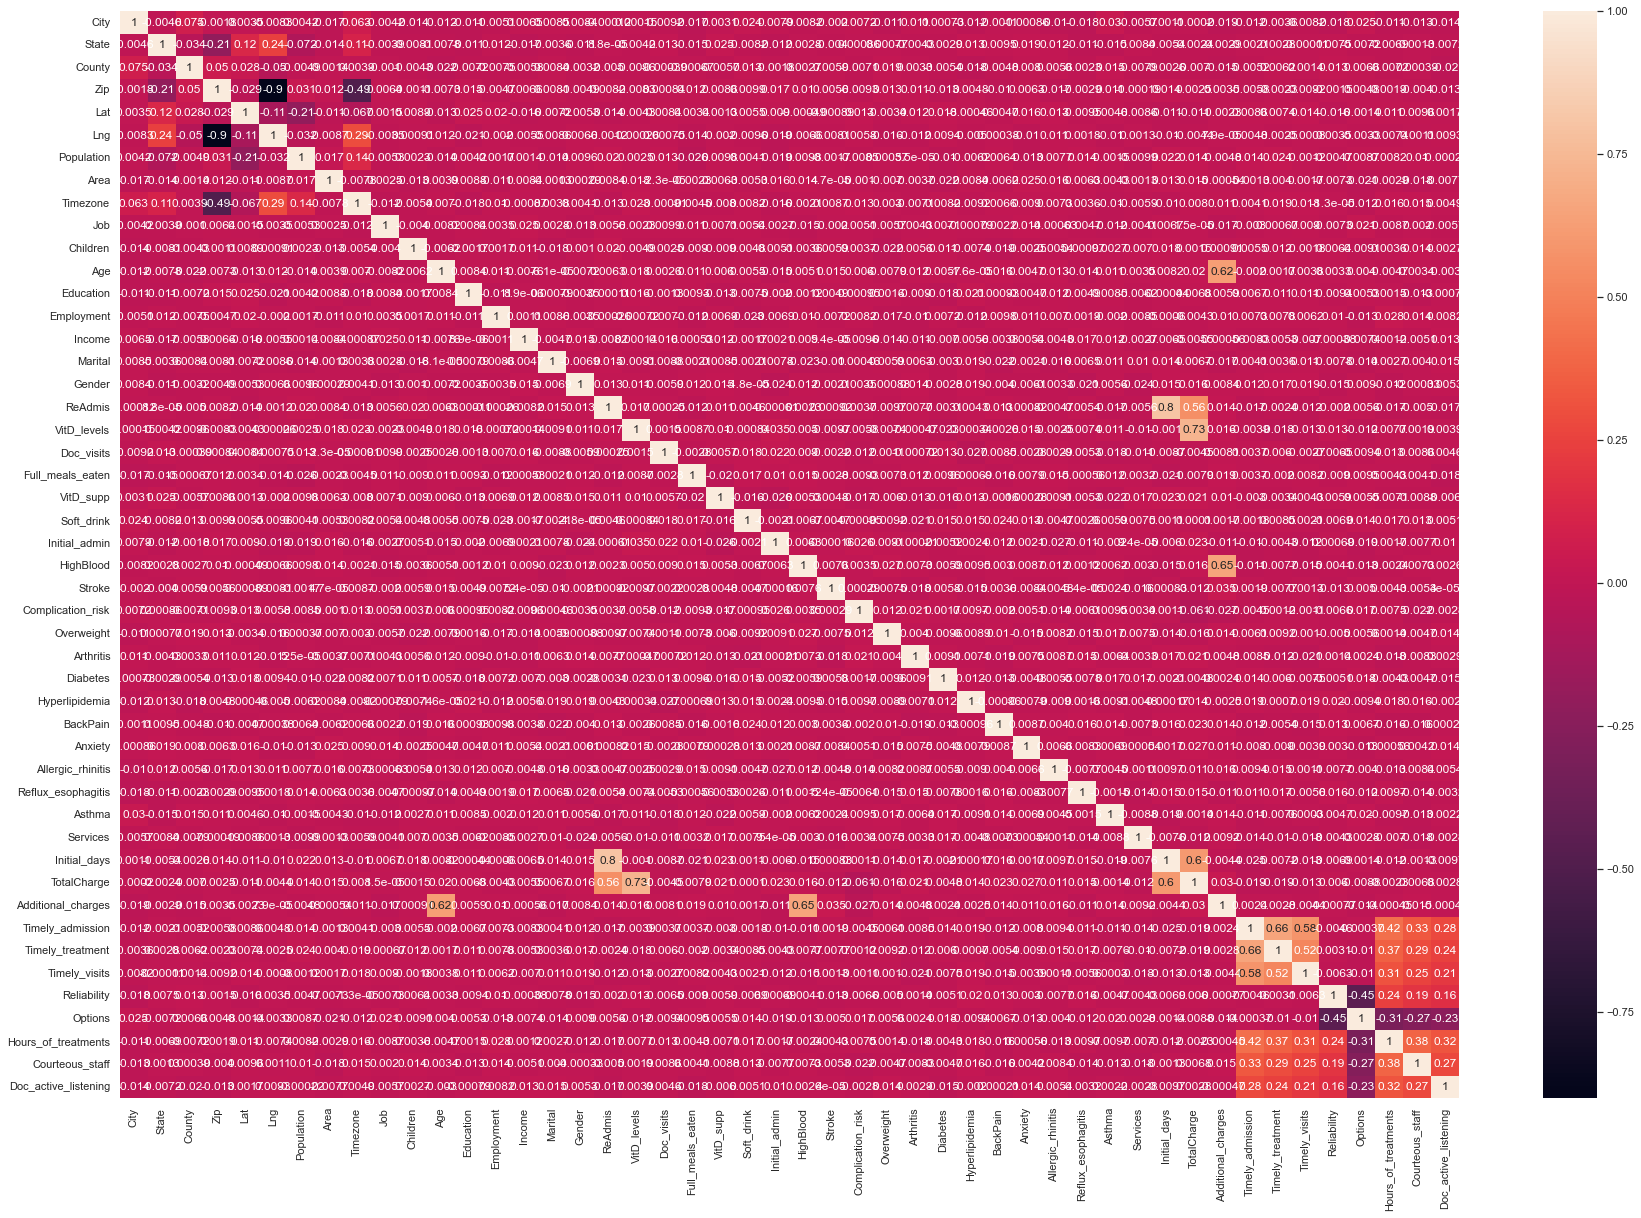

In [73]:
copy_df.drop('CaseOrder', inplace=True, axis=1)

#heatmap for all data 
plt.figure(figsize=(30,20))
sns.heatmap(copy_df.corr(), annot=True)


we have to zoom in, but we can see that the strongest correlation of readmis, is initial days
It looks like the largest correlations have to do with how the hospital handled the patients initial stay 

In [74]:


# lets look at another matrix with information about health, age, gender,  and the initial stay 

hospital_stay = copy_df[['ReAdmis', 'Age', 'Gender', 'VitD_levels', 'Doc_visits', 'Full_meals_eaten',
                           'VitD_supp', 'Soft_drink', 'Initial_admin', 'HighBlood', 'Stroke', 'Complication_risk',
                           'Overweight', 'Arthritis', 'Diabetes', 'Hyperlipidemia', 'BackPain', 'Anxiety', 'Allergic_rhinitis',
                           'Reflux_esophagitis', 'Asthma', 'Services', 'Initial_days', 'TotalCharge', 'Additional_charges', 'Timely_admission',
                           'Timely_treatment', 'Timely_visits', 'Reliability', 'Options', 'Hours_of_treatments', 'Courteous_staff', 'Doc_active_listening']]



<AxesSubplot:>

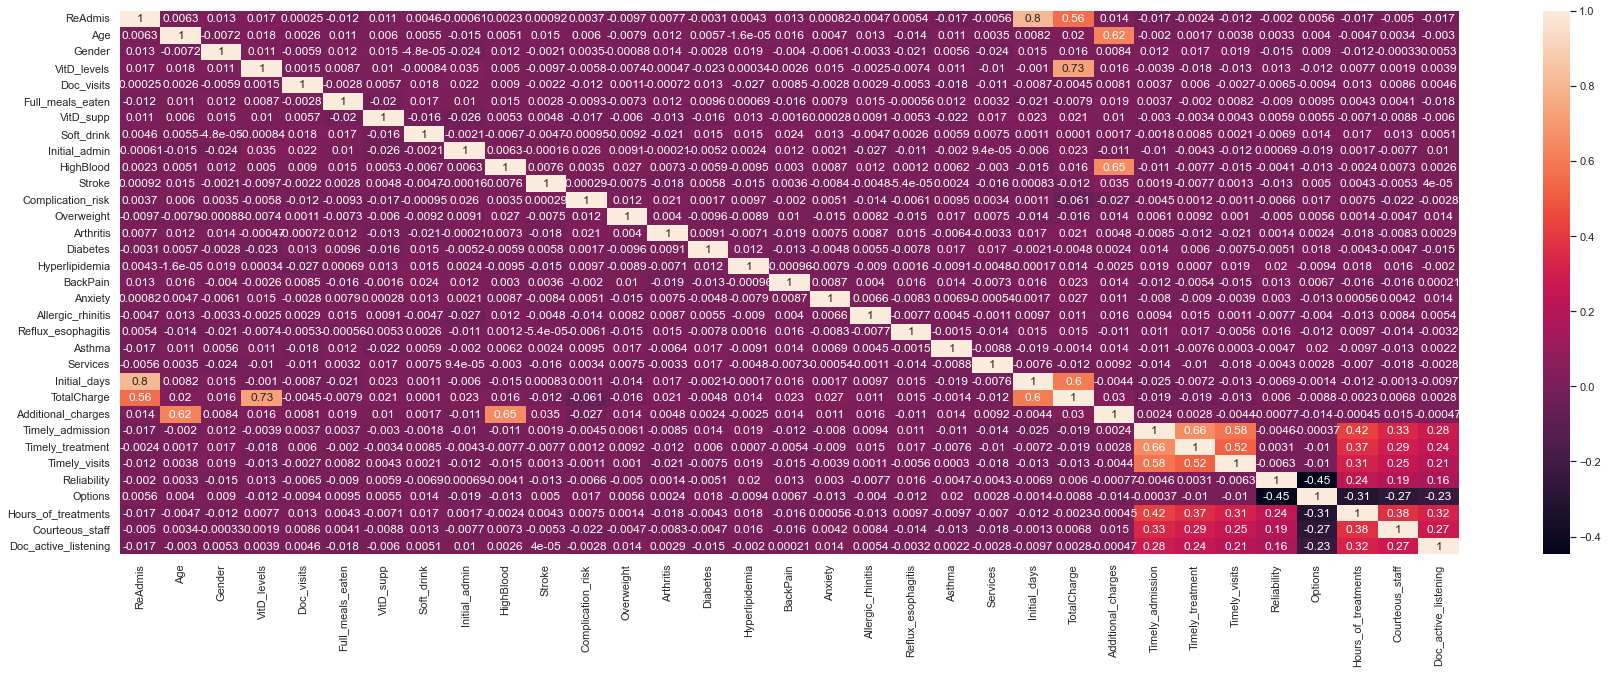

In [75]:
plt.figure(figsize=(30,10))
sns.heatmap(hospital_stay.corr(), annot=True)

In [76]:
# doing some investigation ReAdmis depends on Initial_days, which also depends on TotalCharge, which depends on VitD_levels
# VitD levels didn't really correlate to anything I ended it there 
# Also wanted to add some more health correlation -> additional_charges to highblood to gender 
deeper_correlation = copy_df[['ReAdmis', 'Initial_days', 'TotalCharge', 'Additional_charges', 'VitD_levels', 'Gender', 'Age', 'Overweight', 'Diabetes', 'HighBlood']]

<AxesSubplot:>

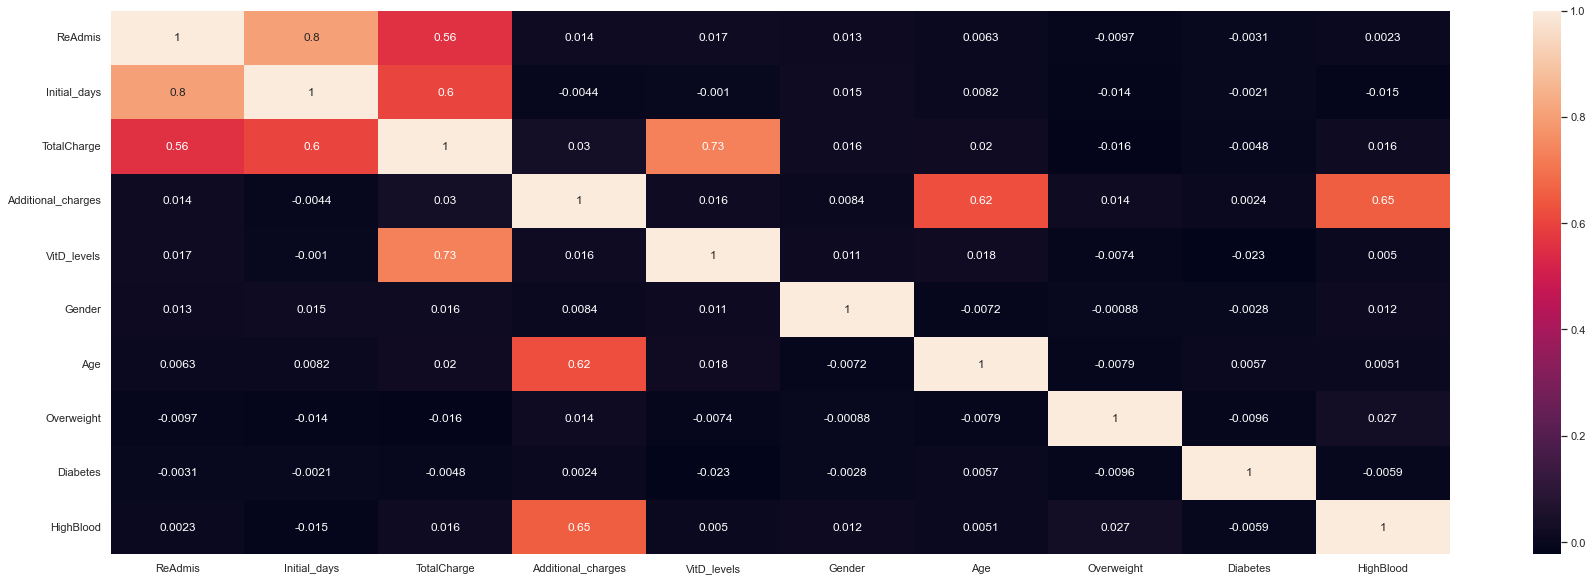

In [77]:
# A clearer look at those correlations 
plt.figure(figsize=(30,10))
sns.heatmap(deeper_correlation.corr(), annot=True)

In [78]:
# Surveys responses also had a huge correlation. Lets just look at that 

survey = copy_df[['Timely_admission','Timely_treatment', 'Timely_visits', 'Reliability', 
                     'Options', 'Hours_of_treatments', 'Courteous_staff', 'Doc_active_listening']]

<AxesSubplot:>

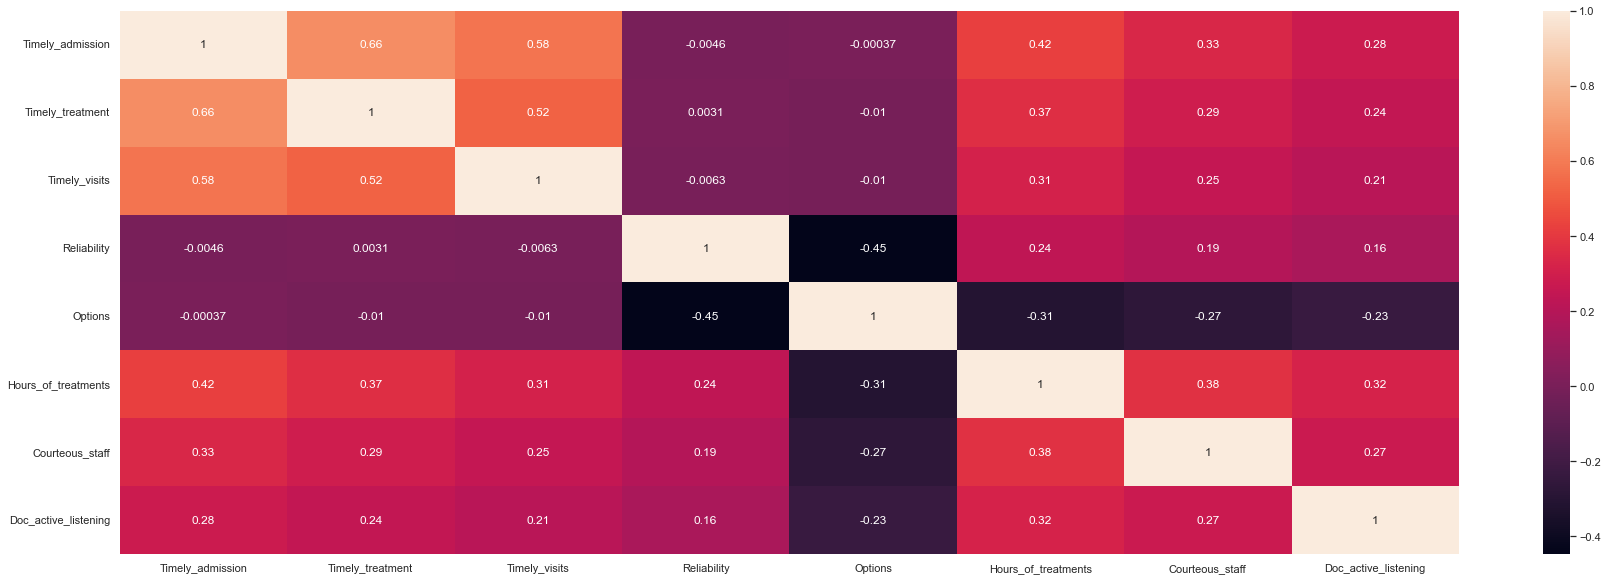

In [79]:
# A clearer look at those correlations 
plt.figure(figsize=(30,10))
sns.heatmap(survey.corr(), annot=True)

In [80]:
# the only important data, in correlation to Readmis is the first matrix. 
# put into a numerical csv 

deeper_correlation.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ReAdmis             10000 non-null  int64  
 1   Initial_days        10000 non-null  float64
 2   TotalCharge         10000 non-null  float64
 3   Additional_charges  10000 non-null  float64
 4   VitD_levels         10000 non-null  float64
 5   Gender              10000 non-null  int64  
 6   Age                 10000 non-null  float64
 7   Overweight          10000 non-null  float64
 8   Diabetes            10000 non-null  int64  
 9   HighBlood           10000 non-null  int64  
dtypes: float64(6), int64(4)
memory usage: 1.1 MB


In [81]:
# export to csv 
deeper_correlation.to_csv('Desktop/medical_important_data.csv')

# Normalize data 

In [82]:
# normalize data 
normal = (deeper_correlation - deeper_correlation.mean()) / deeper_correlation.std()

# Scree Plot

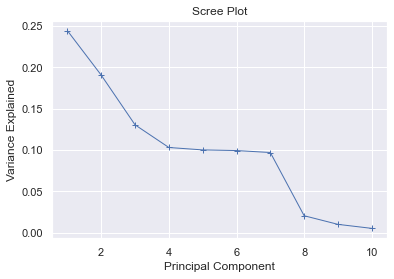

In [83]:
# create PCA scree plot 
sns.set(font_scale=1)
pca = PCA(n_components=normal.shape[1])
pca.fit(normal)
PC_values = np.arange(pca.n_components_) + 1 
plt.plot(PC_values, pca.explained_variance_ratio_, 'b+-', linewidth=1)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

In [84]:
pca = PCA(2) 
projected = pca.fit_transform(normal)
print(normal.shape)
print(projected.shape)

(10000, 10)
(10000, 2)


# Cummulative Explained Variance 

Text(0, 0.5, 'Cumulative Explained Variance')

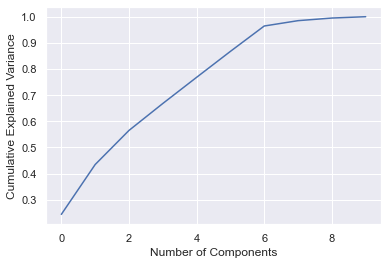

In [85]:
pca = PCA().fit(normal)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

# Display Table of Explained Variance Ratios

In [86]:
pca.explained_variance_ratio_

array([0.24427443, 0.19050231, 0.13040109, 0.10298061, 0.10007643,
       0.09927409, 0.09691781, 0.02043023, 0.00999668, 0.00514631])

# Calculate Eigenvalues 

In [87]:
matrix = np.dot(normal.T, normal) / deeper_correlation.shape[0]
eigenvalues = [np.dot(eigenvector.T, np.dot(matrix, eigenvector))for eigenvector in pca.components_]

# Plot Eigenvalues

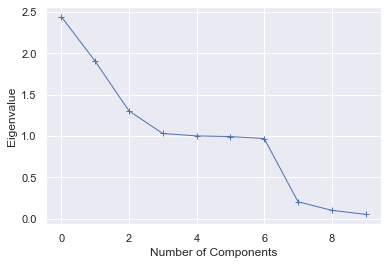

In [88]:
# plot eigenvalues 
plt.plot(eigenvalues, 'b+-', linewidth=1)
plt.xlabel('Number of Components')
plt.ylabel('Eigenvalue')
plt.show()

##### It would be pointless to use anymore than 6 components, that's when the score drops below 1 

# Highlighted Component Matrix

In [89]:
# display list of component values 
loadings = pd.DataFrame(pca.components_.T,
                       columns =['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7','PC8', 'PC9', 'PC10'],
                       index=deeper_correlation.columns)
loadings.style.highlight_max(color = 'yellow', axis = 0)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
ReAdmis,0.527505,-0.045872,-0.393091,-0.019114,-0.015317,-0.010601,0.005185,-0.745486,0.028503,0.088389
Initial_days,0.536596,-0.058401,-0.390949,-0.007001,-0.012476,-0.014998,-0.004732,0.635944,-0.004344,0.388481
TotalCharge,0.581960,-0.015289,0.326085,0.003250,-0.005580,0.037646,0.007345,0.152932,-0.030878,-0.727257
Additional_charges,0.044927,0.703695,-0.032187,0.010666,0.002423,-0.006379,0.010129,-0.017850,-0.707179,0.032799
VitD_levels,0.300916,0.011834,0.762226,0.012371,-0.002098,0.039944,-0.003398,-0.123544,0.024941,0.557379
Gender,0.019157,0.007682,0.008840,-0.301093,0.870692,-0.181422,-0.343219,-0.001687,0.003560,-0.002258
Age,0.036385,0.485028,-0.020630,0.460708,-0.092019,-0.191452,-0.518931,0.012069,0.485548,-0.020796
Overweight,-0.016127,0.023134,-0.006067,-0.606755,-0.364344,0.381234,-0.594066,0.003667,-0.000239,-0.001512
Diabetes,-0.008471,0.001433,-0.056451,0.387292,0.305461,0.867555,-0.025353,-0.003621,0.002760,0.011041
HighBlood,0.023099,0.512909,-0.023569,-0.422199,0.083323,0.170439,0.509055,0.026093,0.511580,-0.007662


#### The components that hold the most weight in each plot are highlighted 
#### Based off PC1 -> TotalCharge, Inital_days, ReAdmis hold the most weight 
#### PC2 -> Additional_charges, HighBlood, and Age hold the most weight 
### Most Important Components: TotalCharge, Initial_days, ReAdmis, Additional_charges, HighBlood, and Age 
#### Proves that after 6 components, the score doesn't matter and is also resembled on the heatmap above 